In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

### Importing data

In [2]:
data = pd.read_csv('preprocessed_data.csv')

In [3]:
data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,0,2,1,28.0,13.0000,2,3,0
1,1,0,3,1,25.0,7.6500,2,3,0
2,2,0,3,1,20.0,7.8542,2,3,0
3,3,0,3,0,29.0,21.0750,2,3,4
4,4,0,1,1,31.0,52.0000,2,3,1


In [4]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
X = data[["Pclass","Sex","Age","Embarked","Title","FamilySize"]].values
Y = data["Survived"]

### Verifying that data is not null

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


### Spliting data to train and test sets

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 30)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 6)
(712,)
(179, 6)
(179,)


### Apply logistic regression

In [10]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

### Calculate accuracy

In [11]:
print('the accuracy is {0:.2f}'.format(log_reg.score(x_test,y_test)))

the accuracy is 0.75


### Use of confusion matrix

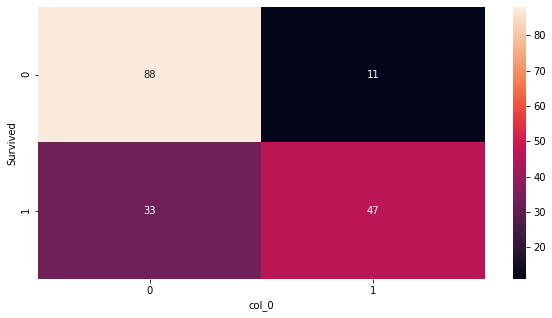

In [12]:
mat = pd.crosstab(y_test,log_reg.predict(x_test))
plt.figure(figsize=(10, 5))
sns.heatmap(mat,annot = True)
plt.show()

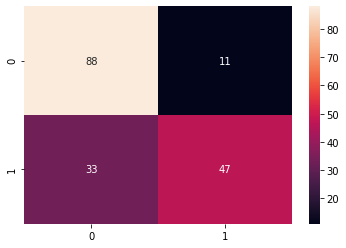

In [13]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,log_reg.predict(x_test))
sns.heatmap(confusion,annot = True)
plt.show()

In [14]:
print( ' accuracy using confusion map is {0:.2f}'.format((88+47) / (88+47+11+33)))

 accuracy using confusion map is 0.75


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_reg.predict(x_test)))


              precision    recall  f1-score   support

           0       0.73      0.89      0.80        99
           1       0.81      0.59      0.68        80

    accuracy                           0.75       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.76      0.75      0.75       179



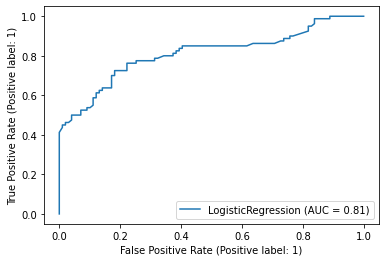

In [16]:
from sklearn import metrics
metrics.plot_roc_curve(log_reg, x_test, y_test)  
plt.show() 


In [18]:
print ("AUC score is {0:.2f}".format(metrics.roc_auc_score(y_test, log_reg.predict(x_test))))

AUC score is 0.74
